# KISHORE NAGARAJAN
# Iris decision tree 

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
mydata_iris = pd.read_csv(r"E:\WINTER SEM 2020-2021\ML\Datasets\AAIris.csv")
mydata_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# To Check first 5 rows of Dataset
mydata_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Checking all the columns
mydata_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Checking all the columns
mydata_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Shape Of the Dataset
mydata_iris.shape

(150, 6)

In [10]:
# Datatype of each Attribute 
mydata_iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
# Checking the presence of Missing values
mydata_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# To check Statistical Details of Dataset
mydata_iris.describe(include="all").transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# To check the Skewness of the Attributes
mydata_iris.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

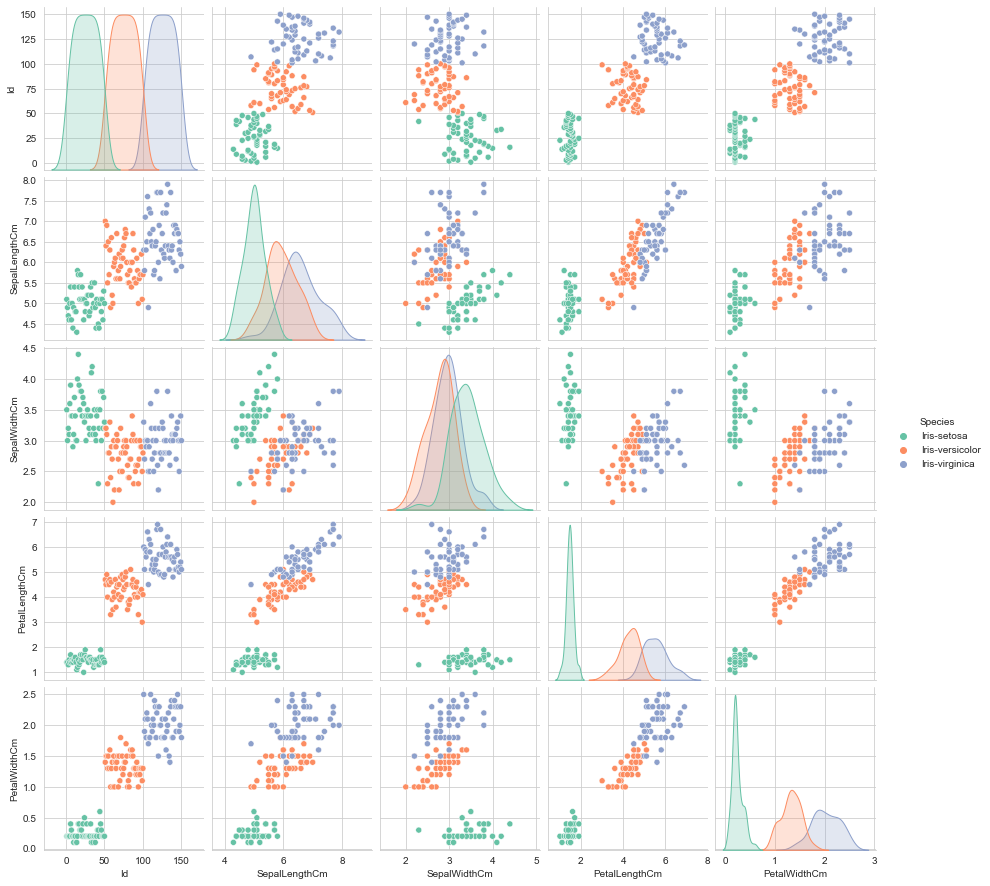

In [14]:
# Pair plot
sns.pairplot(mydata_iris,hue = 'Species',palette = 'Set2')

<AxesSubplot:>

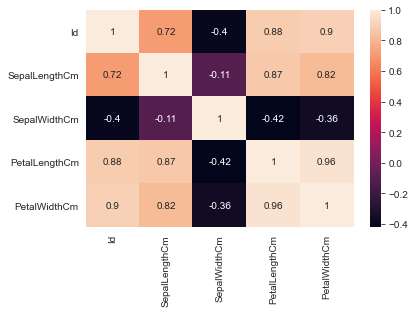

In [15]:
# Correlation between the Attributes
sns.heatmap(mydata_iris.corr(), annot=True)


In [16]:
X = mydata_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = mydata_iris[['Species']]

In [17]:
from sklearn.model_selection import train_test_split # Import Library
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (105, 4)
X_test (45, 4)
y_train (105, 1)
y_test (45, 1)


In [21]:
# Importing libraries for Decision tree algorithm and Visualization
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from six import StringIO
from IPython.display import Image  
import matplotlib.image as mp
from sklearn import metrics


In [38]:
# Defining the decision tree algorithm
dt_model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100,max_leaf_nodes=20,random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_leaf_nodes=20,
                       random_state=0)

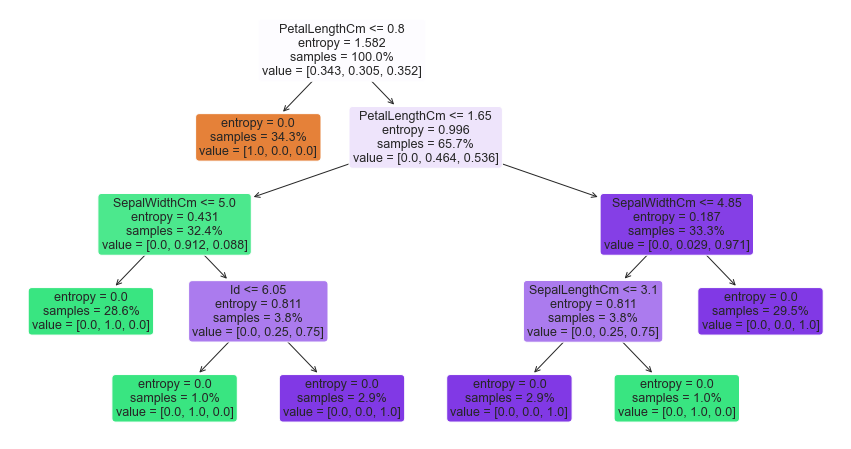

In [39]:
# Visualize the Decision Tree
plt.figure(figsize=(15,8))
tree.plot_tree(dt_model, filled=True, feature_names=mydata_iris.columns, precision = 3, proportion =True, rounded=True) 
plt.show()

In [40]:
predict_test = dt_model.predict(X_test)

In [41]:
print("The Accuracy of Decision Tree is", metrics.accuracy_score(predict_test,y_test) * 100 ,'%')

The Accuracy of Decision Tree is 95.55555555555556 %


In [42]:
from sklearn.metrics import classification_report,confusion_matrix # Import library
confusion_matrix(y_test, predict_test)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [43]:
print(classification_report(y_test,predict_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [44]:
print(dt_model.score(X_test, y_test))

0.9555555555555556
